# Chapitre 3

In [41]:
%matplotlib inline

import thinkstats2 as ts
import thinkplot as tp
import probability as prob
import numpy as np
import nsfg
import first
import math

**Exercice 3.1**

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable numkdhh to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [42]:
resp = nsfg.ReadFemResp()

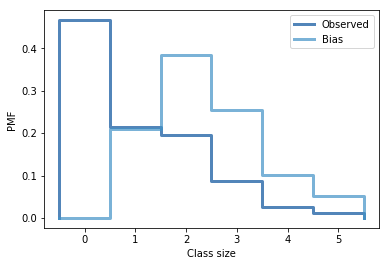

In [43]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

observed_pmf = ts.Pmf(resp.numkdhh, label = 'Observed')
bias_pmf = BiasPmf(unbias_pmf, label = 'Bias')

tp.PrePlot(2)
tp.Pmfs([observed_pmf, bias_pmf])
tp.Config(xlabel='Class size', ylabel='PMF')

**Exercise 3.2**

Write two function to compute the mean and variance from a PMF.

In [44]:
def PmfMean(pmf_object):
    item_list = []
    for i in pmf_object:
        item_list.append(i * pmf_object.Prob(i))
    return sum(item_list)

In [45]:
def PmfVar(pmf_object):
    item_list = []
    mean = PmfMean(pmf_object)
    for i in pmf_object:
        item_list.append(pmf_object.Prob(i) * (i - mean)**2)
    return sum(item_list)

In [46]:
print("La moyenne d'enfant dans le ménage est : ", PmfMean(observed_pmf))
print("L'écart type d'enfant dans le ménage est : ", math.sqrt(PmfVar(observed_pmf)))

La moyenne d'enfant dans le ménage est :  1.024205155043831
L'écart type d'enfant dans le ménage est :  1.1886396957670224


In [47]:
print("La moyenne d'enfant dans le ménage avec biais est : ", PmfMean(bias_pmf))
print("L'écart type d'enfant dans le ménage avec biais est : ", math.sqrt(PmfVar(bias_pmf)))

La moyenne d'enfant dans le ménage avec biais est :  2.403679100664282
L'écart type d'enfant dans le ménage avec biais est :  1.083176857907326


**Exercise 3.3**

I started this book with the question, "Are first babies more likely to be late?" To address it, I computed the difference in means between groups of babies, but I ignored the possibility that there might be a difference between first babies and others for the same woman.

To address this version of the question, select respondents who have at least two live births and compute pairwise differences. Does this formulation of the question yield a different result?

Hint: use `nsfg.MakePregMap`:

In [48]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
preg_map = nsfg.MakePregMap(live)

-0.056367432150313312

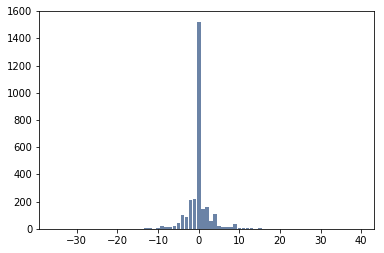

In [49]:
hist = ts.Hist()
for caseid, indices in preg_map.items():
    if len(indices) >= 2:
        pair = preg.loc[indices[0:2]].prglngth
        diff = np.diff(pair)[0]
        hist[diff] += 1
tp.Hist(hist)
pmf = ts.Pmf(hist)
pmf.Mean()

**Exercise 3.4** 
    
In most foot races, everyone starts at the same time. If you are a fast runner, you usually pass a lot of people at the beginning of the race, but after a few miles everyone around you is going at the same speed.
When I ran a long-distance (209 miles) relay race for the first time, I noticed an odd phenomenon: when I overtook another runner, I was usually much faster, and when another runner overtook me, he was usually much faster.

At first I thought that the distribution of speeds might be bimodal; that is, there were many slow runners and many fast runners, but few at my speed.

Then I realized that I was the victim of a bias similar to the effect of class size. The race was unusual in two ways: it used a staggered start, so teams started at different times; also, many teams included runners at different levels of ability.

As a result, runners were spread out along the course with little relationship between speed and location. When I joined the race, the runners near me were (pretty much) a random sample of the runners in the race.

So where does the bias come from? During my time on the course, the chance of overtaking a runner, or being overtaken, is proportional to the difference in our speeds. I am more likely to catch a slow runner, and more likely to be caught by a fast runner. But runners at the same speed are unlikely to see each other.

Write a function called `ObservedPmf` that takes a `Pmf` representing the actual distribution of runners’ speeds, and the speed of a running observer, and returns a new `Pmf` representing the distribution of runners’ speeds as seen by the observer.

To test your function, you can use `relay.py`, which reads the results from the James Joyce Ramble 10K in Dedham MA and converts the pace of each runner to mph.

Compute the distribution of speeds you would observe if you ran a relay race at 7 mph with this group of runners.

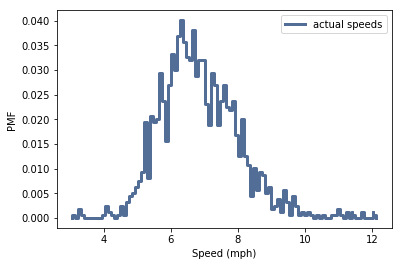

In [50]:
import relay

results = relay.ReadResults()
speeds = relay.GetSpeeds(results)
speeds = relay.BinData(speeds, 3, 12, 100)

pmf = ts.Pmf(speeds, 'actual speeds')
tp.Pmf(pmf)
tp.Config(xlabel='Speed (mph)', ylabel='PMF')

In [51]:
def ObservedPmf(pmf, speed, label = None) :
    bias_pmf = pmf.Copy(label=label)
    for i in bias_pmf.Values():
        diff = abs(i - speed)
        bias_pmf[i] *= diff
    bias_pmf.Normalize()
    return bias_pmf

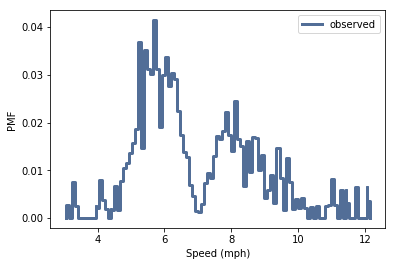

In [52]:
bias_pmf = ts.Pmf(ObservedPmf(pmf, 7, 'observed'))
tp.Pmf(bias_pmf)
tp.Config(xlabel='Speed (mph)', ylabel='PMF')